In [70]:
import pandas as pd
import numpy as np
import os
import healpy as hp
from astroquery.vizier import Vizier
import astropy.coordinates as coord
import astropy.units as u
from astropy.time import Time
import math


In [71]:
def separate_catalogs(df, outdir):
    global index
    global gaia_df
    for catalog in info.index:
        cat_df = pd.DataFrame()
        cat_df['source_id'] = gaia_df.source_id
        cat_df['gaia_ra'] = gaia_df.ra
        cat_df['gaia_dec'] = gaia_df.dec
        cat_df['gaia_ra_error'] = gaia_df.ra_error
        cat_df['gaia_dec_error'] = gaia_df.dec_error
        cat_df['pmra'] = gaia_df.pmra
        cat_df['pmdec'] = gaia_df.pmdec
        cat_df['pmra_error'] = gaia_df.pmra_error
        cat_df['pmdec_error'] = gaia_df.pmdec_error
        cat_df['gaia_epoch'] = gaia_df.ref_epoch
        cat_df['cat_info'] = df[catalog]
        cat_df = cat_df.dropna()
        cat_df['cat_ra'] = cat_df.cat_info.apply(lambda s: float(s.split('|')[2]))
        cat_df['cat_dec'] = cat_df.cat_info.apply(lambda s: float(s.split('|')[3]))
        cat_df['cat_epoch'] = cat_df.cat_info.apply(lambda s: float(s.split('|')[4]))
        cat_df['delta_mag'] = cat_df.cat_info.apply(lambda s: float(s.split('|')[0]))
        cat_df['dist_sec'] = cat_df.cat_info.apply(lambda s: float(s.split('|')[1]))
        cat_df = cat_df.drop('cat_info', axis = 1)
        cat_df = cat_df.set_index('source_id')
        filepath = os.path.join(outdir,catalog+'.csv')
        cat_df.to_csv(filepath)
    return 0

In [72]:
def mag_r(pd):
    global index
    cats_r = pd.DataFrame()
    cats_mag = pd.DataFrame()
    for catalog in info.index:
        data = df[catalog].fillna('||||')
        data = data.apply(lambda s: s.replace('nan', ''))
        data.to_csv('temp.csv', index=False, header = False)
        data = pd.read_csv('temp.csv', sep='|', header = None)
        data.columns = ['delta_mag', '_r', 'ra', 'dec', 'ref_epoch']
        cats_r[catalog] = data._r#.dropna()
        cats_mag[catalog] = data.delta_mag#.dropna()
    return cats_mag, cats_r

In [73]:
def mag_r_disc(outdir):
    mag_df = pd.DataFrame(np.array([[1], [2], [3], [4], [5], [6], [7], [8]]),
                          columns=['a'], 
                          index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
    r_df = pd.DataFrame(np.array([[1], [2], [3], [4], [5], [6], [7], [8]]),
                        columns=['a'], 
                        index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
    for file in os.listdir(outdir):
        cat_df = pd.read_csv(file)
        
        mag_df = mag_df.merge(cat_df.describe()['delta_mag'], 
                              left_index=True, right_index=True, 
                              suffixes=('','_'+file.split('.')[0]))
        
        r_df = r_df.merge(cat_df.describe()['dist_sec'], 
                          left_index=True, right_index=True, 
                          suffixes=('','_'+file.split('.')[0]))
    
    mag_df = mag_df.drop('a', axis=1)
    r_df = r_df.drop('a', axis=1)
    #display(mag_df)
    #display(r_df)
    return mag_df, r_df

In [74]:
gaia_columns = ['source_id', 'ra', 'dec', 'ra_error', 'dec_error', 'ref_epoch', \
                'pmra', 'pmdec', 'pmra_error', 'pmdec_error', 'phot_g_mean_mag']
gaiapath = os.path.join('source','GaiaSource-my_close_stars.csv')
gaia_df = pd.read_csv(gaiapath)[gaia_columns]
gaia_df = gaia_df.rename(columns={'phot_g_mean_mag': 'mag'})

info = pd.read_csv('cat_info.csv').fillna('NaN')

In [75]:
#infile = 'catalog_positions_mag.csv'
#infile = 'catalog_positions_r.csv'
infile = 'catalog_positions.csv'
df = pd.read_csv(infile)
outdir = infile.split('.')[0]
separate_catalogs(df, outdir)
cats_mag, cats_r = mag_r(pd)

In [78]:
#mag_df, r_df = mag_r_disc(outdir)
#display(mag_df)
#display(r_df)

delta_r statistic


,CMC15,Pan-STARRS DR1,2MASS All-Sky,SDSS DR12,URAT1,UCAC4
count,148.000000,151.000000,212.000000,37.000000,95.000000,189.000000
mean,8.319581,2.975974,5.315830,2.069162,11.856895,14.440307
std,7.343262,4.554936,4.501378,2.026580,12.312916,10.926196
min,0.211000,0.003000,0.054000,0.051000,0.030000,0.052000
25%,2.499000,0.090500,2.154500,0.941000,0.286500,2.627000
50%,5.646000,0.769000,4.243500,1.574000,5.152000,14.062000
75%,12.073500,4.301500,7.341000,2.558000,25.223500,25.652000
max,28.945000,20.446000,24.857000,10.712000,29.898000,29.894000


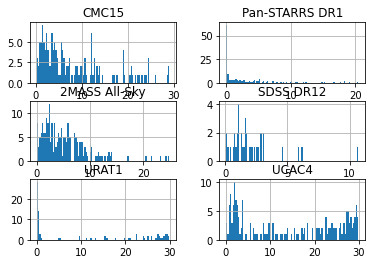

In [77]:
print('delta_r statistic')
hist = cats_r.hist(bins = 100)
cats_r.describe()

delta_mag statistic


,CMC15,Pan-STARRS DR1,2MASS All-Sky,SDSS DR12,URAT1,UCAC4
count,148.000000,150.000000,212.000000,37.000000,46.000000,97.000000
mean,2.570338,1.541400,3.825613,2.467027,2.149565,3.016701
std,1.724800,0.954781,1.520765,0.932255,1.265865,1.847632
min,0.030000,0.020000,0.330000,0.390000,0.360000,0.210000
25%,0.715000,0.795000,2.837500,2.180000,1.670000,1.740000
50%,2.780000,1.565000,3.665000,2.410000,1.890000,2.060000
75%,3.785000,1.985000,4.890000,3.020000,2.290000,4.580000
max,6.420000,6.240000,7.270000,4.240000,6.740000,7.270000


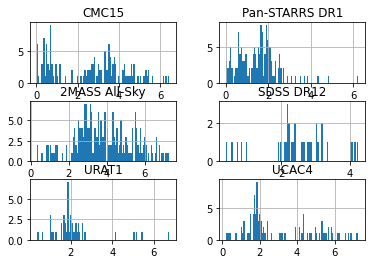

In [14]:
print('delta_mag statistic')
hist = cats_mag.hist(bins = 100)
cats_mag.describe()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ra              213 non-null    float64
 1   dec             213 non-null    float64
 2   pmra            213 non-null    float64
 3   pmdec           213 non-null    float64
 4   CMC15           148 non-null    object 
 5   Pan-STARRS DR1  151 non-null    object 
 6   2MASS All-Sky   212 non-null    object 
 7   SDSS DR12       37 non-null     object 
 8   URAT1           95 non-null     object 
 9   UCAC4           189 non-null    object 
dtypes: float64(4), object(6)
memory usage: 16.8+ KB
